### https://www.kaggle.com/hrithikjain49/naukri-com-analysis-of-india

####  naukri.com is a recruitment platform that provides hiring-related services to corporates/recruiters, placement agencies and to job seekers in India.

#### The data set captures the 14 attributes of the job postings that are done between 2015 - 2017
    This is naukri.com job portal dataset and it was created by teams at PromptCloud and DataStock. The dataset gives you information about job opportunities published by recruiters and has some importand features or columns such as Industry, Location, Payrate, Experience required in Years etc which can be analysed.

In [2]:
import numpy as np #for algebric calculations
import pandas as pd #essential for data reading,writing etc
import seaborn as sns #visualization library
import plotly.express as px #ploting parameter's

import matplotlib.pyplot as plt #visualization library.

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
print('Python : {}'.format(sys.version[0:5]))
print('Numpy : {}'.format(np.__version__))
print('Pandas : {}'.format(pd.__version__))
print('Seaborn : {}'.format(sns.__version__))


Python : 3.8.8
Numpy : 1.20.1
Pandas : 1.2.4
Seaborn : 0.11.1


In [4]:
import plotly 
plotly.__version__

'5.2.1'

In [5]:

# Define the path of CSV file & import the dataset.

df=pd.read_csv(r'G:\Data Analytics Projects\Naukri.com/naukri_com-job_sample.csv') 

In [6]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0


In [7]:
# Display the number of rows and columns in the dataset.

nrow,ncol=df.shape
print(f'There are {nrow} rows and {ncol} colunms in the dataset')

There are 22000 rows and 14 colunms in the dataset


### Showcase your missing values 

In [8]:
count_missing = df.isnull().sum()
count_missing

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
dtype: int64

In [9]:
percent_missing =  count_missing* 100 / len(df)
percent_missing

company                 0.018182
education               9.072727
experience              0.018182
industry                0.022727
jobdescription          0.018182
jobid                   0.000000
joblocation_address     2.277273
jobtitle                0.000000
numberofpositions      79.709091
payrate                 0.440909
postdate                0.104545
site_name              81.877273
skills                  2.400000
uniq_id                 0.000000
dtype: float64

In [10]:
missing_value_df = pd.DataFrame({'count_missing': count_missing,
                                 'percent_missing': percent_missing})

missing_value_df.style.background_gradient(cmap='Spectral')

,count_missing,percent_missing
company,4,0.018182
education,1996,9.072727
experience,4,0.018182
industry,5,0.022727
jobdescription,4,0.018182
jobid,0,0.000000
joblocation_address,501,2.277273
jobtitle,0,0.000000
numberofpositions,17536,79.709091
payrate,97,0.440909


In [11]:
for i in df.columns:
    print('{} has {} values'.format(i,len(df[i].unique())))

company has 8470 values
education has 2356 values
experience has 148 values
industry has 64 values
jobdescription has 21064 values
jobid has 21910 values
joblocation_address has 2330 values
jobtitle has 17564 values
numberofpositions has 85 values
payrate has 1849 values
postdate has 4204 values
site_name has 2 values
skills has 46 values
uniq_id has 22000 values


In [12]:
[df[i].unique()for i in df.columns]
## make below results more user-friendly

[array(['MM Media Pvt Ltd', 'find live infotech',
        'Softtech Career Infosystem Pvt. Ltd', ...,
        'TeamLease Services Limited hiring for BPA Solution Architect',
        'Austere Technology Solutions', 'Musk - Startup'], dtype=object),
 array(['UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required',
        'UG: B.Tech/B.E. - Any Specialization PG:MBA/PGDM - Any Specialization',
        'UG: Any Graduate - Any Specialization PG:Any Postgraduate Doctorate:Doctorate Not Required',
        ..., 'PG:MS/M.Sc(Science) - Any Specialization, Statistics',
        'UG: B.Tech/B.E. - Any Specialization PG:MCA - Computers, M.Tech - Any Specialization, MS/M.Sc(Science) - Any Specialization Doctorate:Doctorate Not Required',
        'UG: B.Tech/B.E. - Computers PG:MS/M.Sc(Science) - Computers Doctorate:Doctorate Not Required'],
       dtype=object),
 array(['0 - 1 yrs', '0 - 0 yrs', '4 - 8 yrs', '11 - 15 yrs', '6 - 8 yrs',
        '2 

In [13]:
df['skills'].nunique()

45

In [14]:
list=[]
for i in df.columns:
    list.append([df[i].nunique(), df[i].unique()])
list

[[8469,
  array(['MM Media Pvt Ltd', 'find live infotech',
         'Softtech Career Infosystem Pvt. Ltd', ...,
         'TeamLease Services Limited hiring for BPA Solution Architect',
         'Austere Technology Solutions', 'Musk - Startup'], dtype=object)],
 [2355,
  array(['UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required',
         'UG: B.Tech/B.E. - Any Specialization PG:MBA/PGDM - Any Specialization',
         'UG: Any Graduate - Any Specialization PG:Any Postgraduate Doctorate:Doctorate Not Required',
         ..., 'PG:MS/M.Sc(Science) - Any Specialization, Statistics',
         'UG: B.Tech/B.E. - Any Specialization PG:MCA - Computers, M.Tech - Any Specialization, MS/M.Sc(Science) - Any Specialization Doctorate:Doctorate Not Required',
         'UG: B.Tech/B.E. - Computers PG:MS/M.Sc(Science) - Computers Doctorate:Doctorate Not Required'],
        dtype=object)],
 [147,
  array(['0 - 1 yrs', '0 - 0 yrs', '4 - 8 yrs', '1

In [15]:
## computationally , loops are not faster so lets consider list comprehension
[[df[i].nunique(), df[i].unique()]for i in df.columns]

[[8469,
  array(['MM Media Pvt Ltd', 'find live infotech',
         'Softtech Career Infosystem Pvt. Ltd', ...,
         'TeamLease Services Limited hiring for BPA Solution Architect',
         'Austere Technology Solutions', 'Musk - Startup'], dtype=object)],
 [2355,
  array(['UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required',
         'UG: B.Tech/B.E. - Any Specialization PG:MBA/PGDM - Any Specialization',
         'UG: Any Graduate - Any Specialization PG:Any Postgraduate Doctorate:Doctorate Not Required',
         ..., 'PG:MS/M.Sc(Science) - Any Specialization, Statistics',
         'UG: B.Tech/B.E. - Any Specialization PG:MCA - Computers, M.Tech - Any Specialization, MS/M.Sc(Science) - Any Specialization Doctorate:Doctorate Not Required',
         'UG: B.Tech/B.E. - Computers PG:MS/M.Sc(Science) - Computers Doctorate:Doctorate Not Required'],
        dtype=object)],
 [147,
  array(['0 - 1 yrs', '0 - 0 yrs', '4 - 8 yrs', '1

In [16]:
unique_df=pd.DataFrame(list,columns=['Count','unique'])

In [17]:
##pd.DataFrame([[df[i].nunique(), df[i].unique()]for i in df.columns],
 ##                        columns=['Count','unique'])

In [18]:
unique_df.head()

,Count,unique
0,8469,"[MM Media Pvt Ltd, find live infotech, Softtec..."
1,2355,[UG: B.Tech/B.E. - Any Specialization PG:Any P...
2,147,"[0 - 1 yrs, 0 - 0 yrs, 4 - 8 yrs, 11 - 15 yrs,..."
3,63,"[Media / Entertainment / Internet, Advertising..."
4,21063,[Job Description Send me Jobs like this Qual...


In [19]:
## make dataframe more inetractive
unique_df.style.background_gradient(cmap='Spectral')

### Lets featurize Payrate feature & clean it & split this feature into min_payrate & max_payrate

In [20]:
df['payrate'].head()

0           1,50,000 - 2,25,000 P.A
1    1,50,000 - 2,50,000 P.A. 20000
2        Not Disclosed by Recruiter
3        Not Disclosed by Recruiter
4        Not Disclosed by Recruiter
Name: payrate, dtype: object

In [21]:
pr='1,50,000 - 2,25,000 P.A'

In [22]:
pr.split('-')

['1,50,000 ', ' 2,25,000 P.A']

In [23]:
len_pay=[]
for pay in df['payrate']:
    len_pay.append(len(str(pay).split('-')))

In [24]:
pd.Series(len_pay).value_counts()

1    17028
2     4682
4      126
3       83
5       54
6       24
7        3
dtype: int64

In [25]:
df.shape

(22000, 14)

In [26]:
### so from above stats , it is pretty much clear that 17028 observations are basically my string data & they makes no sense..
### as they have a length of 1

### approx 4682 rows are those , which have total length as 2  , it means they have some min pay & some max pay.


### so in general we will consider these 4682 observations for analysis...

In [27]:
payrate_split=df['payrate'].str.split('-', expand=True)

In [28]:
payrate_split.head(5)

,0,1,2,3,4,5,6
0,"1,50,000","2,25,000 P.A",None,None,None,None,None
1,"1,50,000","2,50,000 P.A. 20000",None,None,None,None,None
2,Not Disclosed by Recruiter,None,None,None,None,None,None
3,Not Disclosed by Recruiter,None,None,None,None,None,None
4,Not Disclosed by Recruiter,None,None,None,None,None,None


In [29]:
## as we have extra whitespaces in our data as ['1,50,000 ', ' 2,25,000 P.A']
#remove space in left and right side as well
payrate_split[0]=payrate_split[0].str.strip()


## payrate_split[0].apply(lambda x:str(x).strip())

In [30]:
payrate_split[0].head()

0                      1,50,000
1                      1,50,000
2    Not Disclosed by Recruiter
3    Not Disclosed by Recruiter
4    Not Disclosed by Recruiter
Name: 0, dtype: object

In [31]:
payrate_split[0].str.replace(',', '')
## payrate_split[0].apply(lambda x:str(x).replace(',',''))

0                            150000
1                            150000
2        Not Disclosed by Recruiter
3        Not Disclosed by Recruiter
4        Not Disclosed by Recruiter
                    ...            
21995    Not Disclosed by Recruiter
21996                        850000
21997    Not Disclosed by Recruiter
21998    Not Disclosed by Recruiter
21999                       1200000
Name: 0, Length: 22000, dtype: object

In [32]:
#remove comma 
payrate_split[0] = payrate_split[0].str.replace(',', '')


In [33]:
payrate_split[0].dtype

dtype('O')

### ways to find whether values are float or not...
    1..Using exception handling
    2..using to_numeric function of pandas
    3..Using regular exprssions
    4..Any function along with map..

In [34]:
### 1..Using exception handling

In [35]:
pay=[]
for payrate in payrate_split[0]:
    try:
        if type(float(payrate))==np.float:
        ## if type(float(payrate))==float:
        
            pay.append(float(payrate))
    except:
           pay.append('missing value')

In [36]:
pay[0:3]

[150000.0, 150000.0, 'missing value']

In [37]:
type(150000.0)

float

In [38]:
### 2..using to_numeric function of pandas

'''
pd.to_numeric(payrate_split[0],errors='coerce')

'''

"\npd.to_numeric(payrate_split[0],errors='coerce')\n\n"

In [39]:
#### 3..Using regular exprssions

In [40]:
### remove all character in two condition

# 1.. remove if we have only characters
# 2.. remove if it starts from anything else other than Digit(ie can be characters , special chars etc..)


'''

pattern='\D.*'
## \D-except digit
## .-any char except new line
## *- 0 or more

payrate_split[0].str.replace(pattern, '').head(20)

'''

"\n\npattern='\\D.*'\n## \\D-except digit\n## .-any char except new line\n## *- 0 or more\n\npayrate_split[0].str.replace(pattern, '').head(20)\n\n"

In [41]:
#### 4..Using Any function along with map..
'''
any(map(str.isnumeric, payrate_split[0].astype(str)))
## any(map(str.isnumeric, payrate_split[0].astype(str)))

### Any: The any() function returns True if any item in an iterable is true, otherwise it returns False.


'''



'\nany(map(str.isnumeric, payrate_split[0].astype(str)))\n## any(map(str.isnumeric, payrate_split[0].astype(str)))\n\n### Any: The any() function returns True if any item in an iterable is true, otherwise it returns False.\n\n\n'

In [42]:
### now Lets do similar stuffs with respect to 1 column

In [43]:
#remove space in left and right 
payrate_split[1] =  payrate_split[1].str.strip()



In [44]:
payrate_split[1].head()

0           2,25,000 P.A
1    2,50,000 P.A. 20000
2                   None
3                   None
4                   None
Name: 1, dtype: object

In [45]:
#remove comma 
payrate_split[1] = payrate_split[1].str.replace(',', '')



In [46]:
### remove all character in two condition
# 1.. remove if we have only characters
# 2.. remove if it starts from anything else other than Digit(ie can be characters , special chars etc..)


pattern='\D.*'
## \D-except digit
## .-any char except new line
## *- 0 or more

payrate_split[1] = payrate_split[1].str.replace(pattern,'')



In [47]:
#display 
payrate_split[1].head(10)

0    225000
1    250000
2      None
3      None
4      None
5      None
6    650000
7      None
8    200000
9      None
Name: 1, dtype: object

In [48]:
payrate_split.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [49]:
payrate_split[0] = pd.to_numeric(payrate_split[0], errors='coerce')
payrate_split[1] = pd.to_numeric(payrate_split[1], errors='coerce')

In [50]:
payrate_split.dtypes

0    float64
1    float64
2     object
3     object
4     object
5     object
6     object
dtype: object

In [51]:
pd.concat([payrate_split[0], payrate_split[1]], axis=1, sort=False)

,0,1
0,150000.0,225000.0
1,150000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
21995,NaN,NaN
21996,850000.0,1400000.0
21997,NaN,NaN
21998,NaN,NaN


In [52]:
pay=pd.concat([payrate_split[0], payrate_split[1]], axis=1, sort=False)

In [53]:
pay.columns=['min_pay','max_pay']

In [54]:
pay.head()

,min_pay,max_pay
0,150000.0,225000.0
1,150000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [55]:
# min and max payrate store the value in the dataframe.

df=pd.concat([df, pay], axis=1, sort=False)

In [56]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0


In [57]:
df.shape

(22000, 16)

In [58]:
'''

df['min_pay']=payrate_split[0]
df['max_pay']=payrate_split[1]


'''

"\n\ndf['min_pay']=payrate_split[0]\ndf['max_pay']=payrate_split[1]\n\n\n"

In [59]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0


###  spliting the experience into min experience to max experience.

In [60]:
df['experience'].head()

0      0 - 1 yrs
1      0 - 0 yrs
2      4 - 8 yrs
3    11 - 15 yrs
4      6 - 8 yrs
Name: experience, dtype: object

In [61]:
df['experience'].head(20)

0       0 - 1 yrs
1       0 - 0 yrs
2       4 - 8 yrs
3     11 - 15 yrs
4       6 - 8 yrs
5       2 - 5 yrs
6       1 - 3 yrs
7       2 - 7 yrs
8       1 - 3 yrs
9       1 - 5 yrs
10      1 - 3 yrs
11      4 - 8 yrs
12      2 - 4 yrs
13      3 - 8 yrs
14      1 - 5 yrs
15      5 - 7 yrs
16      1 - 2 yrs
17      2 - 4 yrs
18     5 - 10 yrs
19      0 - 1 yrs
Name: experience, dtype: object

In [62]:
value='0 - 1 yrs'

In [63]:
value.split('-')

['0 ', ' 1 yrs']

In [64]:
## lets define a function for us that will automate all the tasks for us 
def split_exp(exp):
    min_exp=exp.split('-')[0]
    max_exp=exp.split('-')[1]
    return min_exp,max_exp

In [65]:
split_exp(value)

('0 ', ' 1 yrs')

In [66]:
##df['experience'].dropna().apply(split_exp)

In [67]:
## lets try to figure out that row which will suit for our function
## it means if length of any observation in df dataframe will be equal to 1 or greater than 2 , this function will give error..



len1=[]
for exp in df['experience'].dropna():
    if len(exp.split('-'))!=2:
        len1.append(exp)
        
len1

### list comprehension
### [exp for exp in df['experience'].dropna() if len(exp.split('-'))!=2]

['Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Ment

In [68]:
### so these are the values that will generate problem for us..

In [69]:
### Solution is
## 1.. drop/remove those rows that gives us incorrect solution , but thats not a good approach 
## 2.. Find some optimal solution

### with context to optimal solution , we have 2 approaches:
    1..Very first one is we will basically use in-built function like split from str class
    2..second is we will enhance or improve the existing function 'split_exp'

In [70]:
## lets define a function that will automate it as well as it will handle the scenario of above issue what we have encounter
def split_exp(exp):
    try:
        if len(exp.split('-'))==2:
            min_exp=exp.split('-')[0].strip()
            max_exp=exp.split('-')[1].strip()
        return pd.Series([min_exp,max_exp])
    
    except:
         return pd.Series([np.nan,np.nan])

In [71]:
#### lets find out all those where we have value as 'not mentioned' , just to check our function..

nm=pd.DataFrame(df['experience'].str.contains('Not Mentioned'))

In [72]:
nm

,experience
0,False
1,False
2,False
3,False
4,False
...,...
21995,False
21996,False
21997,False
21998,False


In [73]:
nm[nm['experience']==True].index

Int64Index([ 1138,  5167,  7193,  7195,  7206,  7296,  7385,  7452,  7467,
             7555,
            ...
            12988, 12998, 14404, 20342, 20562, 21295, 21315, 21397, 21430,
            21584],
           dtype='int64', length=111)

In [74]:
split_exp(df['experience'][1138])

0   NaN
1   NaN
dtype: float64

In [75]:
split_exp(df['experience'][5])

0        2
1    5 yrs
dtype: object

In [76]:
## alternative of above to find whose length can't be 2
## df['experience'].unique()

In [77]:
df['experience'].apply(split_exp)

,0,1
0,0,1 yrs
1,0,0 yrs
2,4,8 yrs
3,11,15 yrs
4,6,8 yrs
...,...,...
21995,9,13 yrs
21996,3,5 yrs
21997,2,4 yrs
21998,7,12 yrs


In [78]:
df['experience'].apply(split_exp).rename(columns={0:'min_exp',1:'max_exp'})

,min_exp,max_exp
0,0,1 yrs
1,0,0 yrs
2,4,8 yrs
3,11,15 yrs
4,6,8 yrs
...,...,...
21995,9,13 yrs
21996,3,5 yrs
21997,2,4 yrs
21998,7,12 yrs


In [79]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id', 'min_pay',
       'max_pay'],
      dtype='object')

In [80]:
df[['min_exp','max_exp']]=df['experience'].apply(split_exp).rename(columns={0:'min_exp',1:'max_exp'})

In [81]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id', 'min_pay',
       'max_pay', 'min_exp', 'max_exp'],
      dtype='object')

In [82]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1 yrs
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0 yrs


In [83]:
df['max_exp']=df['max_exp'].str.replace('yrs', '')

In [84]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0


In [85]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
min_exp                 object
max_exp                 object
dtype: object

In [86]:
df['min_exp']=df['min_exp'].astype(float)
df['max_exp']=df['max_exp'].astype(float)

In [87]:
#### 2nd Optimal solution-->> using str.split 
#### what wee have done with respect to payrate feature...

In [88]:
'''
experience_split=df['experience'].str.split('-', expand=True)
experience_split.head()
experience_split[0][0:10].values

## below output will return us extra whitespaces 
#remove space in left and right 
experience_split[0] =  experience_split[0].str.strip()
experience_split[0].unique()


experience_split[1][0:10].values

## below output will return us extra whitespaces 
#remove space in left and right 
experience_split[1] =  experience_split[1].str.strip()


#remove yrs 
experience_split[1]=experience_split[1].str.replace('yrs', '')
experience_split[0].dtype
experience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')
experience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')


experience=pd.concat([experience_split[0], experience_split[1]], axis=1)

# store the min and max experience in the dataframe.
df=pd.concat([df, experience], axis=1)


'''

"\nexperience_split=df['experience'].str.split('-', expand=True)\nexperience_split.head()\nexperience_split[0][0:10].values\n\n## below output will return us extra whitespaces \n#remove space in left and right \nexperience_split[0] =  experience_split[0].str.strip()\nexperience_split[0].unique()\n\n\nexperience_split[1][0:10].values\n\n## below output will return us extra whitespaces \n#remove space in left and right \nexperience_split[1] =  experience_split[1].str.strip()\n\n\n#remove yrs \nexperience_split[1]=experience_split[1].str.replace('yrs', '')\nexperience_split[0].dtype\nexperience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')\nexperience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')\n\n\nexperience=pd.concat([experience_split[0], experience_split[1]], axis=1)\n\n# store the min and max experience in the dataframe.\ndf=pd.concat([df, experience], axis=1)\n\n\n"

In [89]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0


In [90]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id', 'min_pay',
       'max_pay', 'min_exp', 'max_exp'],
      dtype='object')

In [91]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
min_exp                float64
max_exp                float64
dtype: object

In [92]:
df.isnull().sum()

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
min_pay                17359
max_pay                17060
min_exp                  116
max_exp                  116
dtype: int64

In [93]:
# Display average payrate and average experience.
# min experience and max experience define the average experience.
# min payrate and max payrate define the average payrate.

df['avg_payrate']=(df['min_pay'] + df['max_pay'])/2
df['avg_experience']=(df['min_exp'] + df['max_exp'])/2
df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_payrate,avg_experience
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0


### Feature Engineering Of postdate Variable

In [94]:
## just define own custom functions..
## using map
## using date-time module
## using lambda


## if your postdate feature is not a date-time or if it belongs to string nature..u can think of using your split function
# but again thats not a handy way , bcz if we u have different formats of date , it will not be handy...

#### in date-time  , we have 2 data-type (datetime64[ns])  and  (<M8[ns])
     datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
    Both are similar , it entirely how your numpy was compiled..

In [95]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [96]:
df['postdate'].dtype

dtype('O')

In [97]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
min_exp                float64
max_exp                float64
avg_payrate            float64
avg_experience         float64
dtype: object

In [98]:
'''
def fetch_dt_att(dataframe,feature):
    if dataframe[feature].dtype=='<M8[ns]' or 'datetime64[ns]' :
        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])
    else:
        ## to_datetime will parse the dates, which are currently coded as strings, into datetime format
        dataframe[feature]=pd.to_datetime(dataframe[feature])
        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])

'''

"\ndef fetch_dt_att(dataframe,feature):\n    if dataframe[feature].dtype=='<M8[ns]' or 'datetime64[ns]' :\n        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])\n    else:\n        ## to_datetime will parse the dates, which are currently coded as strings, into datetime format\n        dataframe[feature]=pd.to_datetime(dataframe[feature])\n        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])\n\n"

In [99]:
def fetch_dt_att(dataframe,feature):
    try:
        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])
    except:
        print('Data-type is not supported')

In [100]:
fetch_dt_att(df,'postdate')

Data-type is not supported


In [101]:
df['postdate']=pd.to_datetime(df['postdate'])

In [102]:
df[['day','month','year']]=fetch_dt_att(df,'postdate')

In [103]:
pd.set_option('display.max_columns',23)

In [104]:
df.head(8)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00+00:00,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00+00:00,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,NaN,6.0,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,NaN,13.0,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,NaN,7.0,13.0,10.0,2016.0
5,PFS Web Global Services Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,2 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,131016005070,Bengaluru,WALK IN - As400 Developer - Pfsweb Global Serv...,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,8c3af9062ea835b0965779e2c7faac76,NaN,NaN,2.0,5.0,NaN,3.5,13.0,10.0,2016.0
6,Kinesis Management Consultant Pvt. Ltd,NaN,1 - 3 yrs,IT-Software / Software Services,Job Description Send me Jobs like this exper...,131016004451,"Delhi NCR, Mumbai, Bengaluru, Kochi, Greater N...",PHP Developer,2.0,"3,00,000 - 6,50,000 P.A",2016-10-13 16:20:55+00:00,NaN,IT Software - Application Programming,98f84958cd6409386e7f0c9e447b8510,300000.0,650000.0,1.0,3.0,475000.0,2.0,13.0,10.0,2016.0
7,Agile HR consultancy Pvt. Ltd. hiring for Ross...,"UG: Diploma - Any Specialization, Electrical, ...",2 - 7 yrs,Aviation / Aerospace Firms,Job Description Send me Jobs like this Job D...,121016002995,Bengaluru,Member Technical Staff-wire Harness/cable Harn...,20.0,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,NaN,Production,c811c10568fdbfdb3d5e633c99c914b4,NaN,NaN,2.0,7.0,NaN,4.5,13.0,10.0,2016.0


In [105]:
#### Using map

In [106]:
def fetch_dt_att2(x):
    return ([x.day,x.month,x.year])


In [107]:
fe_date=pd.DataFrame(map(fetch_dt_att2,df['postdate'])).rename(columns={0:'day',1:'month',2:'year'})

In [108]:
pd.concat([df,fe_date],axis=1)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,...,max_pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00+00:00,...,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00+00:00,...,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,...,NaN,4.0,8.0,NaN,6.0,13.0,10.0,2016.0,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,...,NaN,11.0,15.0,NaN,13.0,13.0,10.0,2016.0,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,...,NaN,6.0,8.0,NaN,7.0,13.0,10.0,2016.0,13.0,10.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,9 - 13 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,Not Disclosed by Recruiter,2016-11-25 22:47:05+00:00,...,NaN,9.0,13.0,NaN,11.0,25.0,11.0,2016.0,25.0,11.0,2016.0
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,3 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,"8,50,000 - 14,00,000 P.A",2016-11-24 22:47:05+00:00,...,1400000.0,3.0,5.0,1125000.0,4.0,24.0,11.0,2016.0,24.0,11.0,2016.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,2 - 4 yrs,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,Not Disclosed by Recruiter,2016-11-25 22:47:05+00:00,...,NaN,2.0,4.0,NaN,3.0,25.0,11.0,2016.0,25.0,11.0,2016.0
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,7 - 12 yrs,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,Not Disclosed by Recruiter,2016-11-27 22:47:05+00:00,...,NaN,7.0,12.0,NaN,9.5,27.0,11.0,2016.0,27.0,11.0,2016.0


In [109]:
### using date-time module..

In [110]:
df['postdate'].dtype

datetime64[ns, UTC]

In [111]:
'''
df['year'] = df['postdate'].dt.year
df['month'] = df['postdate'].dt.month
df['day'] = df['postdate'].dt.day

'''

"\ndf['year'] = df['postdate'].dt.year\ndf['month'] = df['postdate'].dt.month\ndf['day'] = df['postdate'].dt.day\n\n"

In [112]:
### using lambda 

In [113]:
'''
df['postdate'].apply(lambda x:x.year)
df['postdate'].apply(lambda x:x.month)
df['postdate'].apply(lambda x:x.day)

'''

"\ndf['postdate'].apply(lambda x:x.year)\ndf['postdate'].apply(lambda x:x.month)\ndf['postdate'].apply(lambda x:x.day)\n\n"

In [114]:
# drop the original Date variable

df.drop('postdate', axis=1, inplace = True)

In [115]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0


### Data Cleaning  on Location

In [116]:
df['joblocation_address'].value_counts().head(10)

Bengaluru/Bangalore         3775
Mumbai                      2348
Bengaluru                   1453
Hyderabad / Secunderabad    1246
Chennai                     1204
Hyderabad                    936
Noida                        775
Delhi                        763
Gurgaon                      743
Mumbai , Mumbai              514
Name: joblocation_address, dtype: int64

In [117]:
data=df.copy()

In [118]:
data['joblocation_address'].unique()

array(['Chennai', 'Bengaluru',
       'Mumbai, Bengaluru, Kolkata, Chennai, Coimbatore, Tamilnadu', ...,
       'Mumbai, Bengaluru, Hyderabad, Kolkata',
       'Mumbai, Chennai, Delhi, Bengaluru, Hyderabad, Pune',
       'Bengaluru, Malaysia'], dtype=object)

In [119]:

pd.Series(data['joblocation_address'].unique())

0                                                 Chennai
1                                               Bengaluru
2       Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...
3       Delhi NCR, Mumbai, Bengaluru, Kochi, Greater N...
4                                Mumbai, Delhi, Bengaluru
                              ...                        
2325                           Mumbai, Bengaluru, Kolkata
2326                  Bengaluru, Pune, Chennai, Delhi NCR
2327                Mumbai, Bengaluru, Hyderabad, Kolkata
2328    Mumbai, Chennai, Delhi, Bengaluru, Hyderabad, ...
2329                                  Bengaluru, Malaysia
Length: 2330, dtype: object

In [120]:
data['joblocation_address'].value_counts().head(60).index

Index(['Bengaluru/Bangalore', 'Mumbai', 'Bengaluru',
       'Hyderabad / Secunderabad', 'Chennai', 'Hyderabad', 'Noida', 'Delhi',
       'Gurgaon', 'Mumbai , Mumbai', 'Delhi/NCR(National Capital Region)',
       'Bengaluru/Bangalore , Bengaluru / Bangalore', 'Delhi , Delhi',
       'Noida , Noida/Greater Noida', 'Gurgaon , Gurgaon',
       'Bengaluru/Bangalore , Chennai , Hyderabad / Secunderabad', 'Ghaziabad',
       'Bengaluru/Bangalore , Hyderabad / Secunderabad',
       'Bengaluru, Hyderabad', 'Delhi/NCR(National Capital Region) , Gurgaon',
       'Bengaluru/Bangalore , Chennai',
       'Bengaluru/Bangalore , Mumbai , Chennai , Pune , Hyderabad / Secunderabad , Delhi/NCR(National Capital Region) , Ahmedabad , Kolkata , Surat',
       'Bengaluru/Bangalore , karnataka',
       'Delhi , Delhi/NCR(National Capital Region)',
       'Chennai , Hyderabad / Secunderabad',
       'Hyderabad / Secunderabad , Hyderabad/Secunderabad',
       'Delhi/NCR(National Capital Region) , Noida',
      

In [121]:
'''

replacements = {
   'joblocation_address': {
      r'(Bengaluru/Bangalore)':'Bangalore',
       r'Bengaluru/Bangalore ':'Bangalore',
      r'Bengaluru':'Bangalore',
      r'Bangalore':'Bangalore',
      r'Bangalore Bangalore':'Bangalore',
      r'Bengaluru/Bangalore , bangalore':'Bangalore' ,
      r'Hyderabad / Secunderabad':'Hyderabad',
      r'Hyderabad / Secunderabad , Hyderabad/Secunderabad':'Hyderabad', 
      r'Mumbai , Mumbai':'Mumbai',
      r'Mumbai, maharashtra':'Mumbai', 
      r'Noida': 'Delhi',
      r'Delhi': 'Delhi',
      r'Gurgaon': 'Delhi',
      r'Gurgaon , Gurgaon':'Delhi',
      r'Gurgaon , Delhi/NCR(National Capital Region)':'Delhi', 
      r'Delhi , Delhi/NCR(National Capital Region)':'Delhi', 
      r'Delhi/NCR(National Capital Region)':'Delhi',
      r'Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region)':'Delhi',
      r'DELHI(NATIONAL CAPITAL REGION)':'Delhi',
      r'Delhi/NCR(National Capital Region) , Delhi':'Delhi',
      r'Delhi,Delhi':'Delhi',
      r'Noida , Noida/Greater Noida':'Delhi',
      r'Noida/Greater Noida':'Delhi',
      r'Ghaziabad': 'Delhi',
      r'Delhi/NCR(National Capital Region),Gurgaon':'Delhi',
      r'Delhi/NCR(National Capital Region) , Gurgaon , Noida':'Delhi', 
      r'NCR,NCR': 'Delhi',
      r'Delhi/NCR':'Delhi', 
      r'Delhi/NCR(National Capital Region) , Noida':'Delhi' ,
      r'Bangalore,Bangalore / Bangalore':'Bangalore',
      r'Bangalore,karnataka': 'Bangalore',
      r'Delhi NCR':'Delhi',
      r'Delhi':'Delhi',
       
       ## lets try to expand  it once I call data['joblocation_address'].value_counts().head(20).index & get some more pairs
      r'Delhi , Delhi':'Delhi',
      r'Delhi(National Capital Region)':'Delhi',
        r'Bangalore , Bangalore / Bangalore':'Bangalore',
       r'Delhi , Delhi/Greater Delhi':'Delhi',
       r'Delhi(National Capital Region) , Delhi':'Delhi',
       r'Delhi(National Capital Region) , Delhi':'Delhi',
       
   }
}


'''

"\n\nreplacements = {\n   'joblocation_address': {\n      r'(Bengaluru/Bangalore)':'Bangalore',\n       r'Bengaluru/Bangalore ':'Bangalore',\n      r'Bengaluru':'Bangalore',\n      r'Bangalore':'Bangalore',\n      r'Bangalore Bangalore':'Bangalore',\n      r'Bengaluru/Bangalore , bangalore':'Bangalore' ,\n      r'Hyderabad / Secunderabad':'Hyderabad',\n      r'Hyderabad / Secunderabad , Hyderabad/Secunderabad':'Hyderabad', \n      r'Mumbai , Mumbai':'Mumbai',\n      r'Mumbai, maharashtra':'Mumbai', \n      r'Noida': 'Delhi',\n      r'Delhi': 'Delhi',\n      r'Gurgaon': 'Delhi',\n      r'Gurgaon , Gurgaon':'Delhi',\n      r'Gurgaon , Delhi/NCR(National Capital Region)':'Delhi', \n      r'Delhi , Delhi/NCR(National Capital Region)':'Delhi', \n      r'Delhi/NCR(National Capital Region)':'Delhi',\n      r'Delhi/NCR(National Capital Region) ':'Delhi',\n      r' Delhi/NCR(National Capital Region) ':'Delhi',\n      r' Delhi/NCR(National Capital Region)':'Delhi',\n      r'DELHI(NATIONAL CAPITA

In [ ]:
### Lets read replacements.csv file to extract all possible replacements 

In [124]:
rep=pd.read_csv(r'F:\Data Analysis_projects\Naukri.com/replacements.csv').set_index('Unnamed: 0')

In [125]:
rep[0:2]

,joblocation_address
Unnamed: 0,
Delhi/NCR(National Capital Region),Delhi
Delhi/NCR(National Capital Region),Delhi


In [126]:
replacement_dict=rep.to_dict()

In [127]:
data.replace(replacement_dict,inplace=True,regex=True)

In [ ]:
### lets create separate dataframe for Noida , just to show you whether things have maniplated or not..

In [128]:
p=df[df['joblocation_address']=='Noida']

In [129]:
p

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
1756,Aristocrat Technologies India Pvt. ltd.,UG: B.Tech/B.E. PG:Post Graduation Not Require...,5 - 7 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Test ...,240516500179,Noida,Senior Engineer- Testing,NaN,Not Disclosed by Recruiter,NaN,IT Software - QA & Testing,05e7588ceed77b2ba2ff543131511dc0,NaN,NaN,5.0,7.0,NaN,6.0,24.0,5.0,2016.0
1757,Reliant HR Management Sevice Pvt Ltd,"UG: Any Graduate PG:MBA/PGDM, Any Postgraduate...",7 - 10 yrs,Strategy / Management Consulting Firms,Job Description Send me Jobs like this We ar...,240516500333,Noida,Branch Accountant,NaN,Not Disclosed by Recruiter,NaN,Accounts,67b9bb431f0b7a415892e7ef3d2c591a,NaN,NaN,7.0,10.0,NaN,8.5,24.0,5.0,2016.0
1760,Ebix Software India Pvt. Ltd,UG: Any Graduate PG:Any Postgraduate Doctorate...,8 - 10 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Prima...,200516500544,Noida,Senior Graphic Designer/ ISD,NaN,Not Disclosed by Recruiter,NaN,IT Software - Other,9e10d19a04fae291a383dfc94d2e92d5,NaN,NaN,8.0,10.0,NaN,9.0,20.0,5.0,2016.0
1778,Valuecons Services,"UG: BCA - Computers, B.Tech/B.E. - Electrical ...",3 - 5 yrs,Strategy / Management Consulting Firms,Job Description Send me Jobs like this Urgen...,290516600284,Noida,Urgent Job Opening for iOS Developer @ Noida L...,NaN,Not Disclosed by Recruiter,NaN,IT Software - Mobile,ce3b3606f6bec9383218138ca4e2369f,NaN,NaN,3.0,5.0,NaN,4.0,28.0,5.0,2016.0
1782,Mindworks Global Media Services,UG: Any Graduate PG:Post Graduation Not Requir...,5 - 7 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Job d...,250516500085,Noida,Client Servicing/ Account Manager,NaN,Not Disclosed by Recruiter,NaN,Sales,f01cbefb8008c5d58a1ce834aab6e95a,NaN,NaN,5.0,7.0,NaN,6.0,25.0,5.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,Corbus India Pvt. Ltd.,UG: Any Graduate PG:Post Graduation Not Requir...,1 - 3 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Analy...,160315500051,Noida,Associate - Supply Chain Management,NaN,Not Disclosed by Recruiter,NaN,Supply Chain,b24945bfbd43a43d6b9d91b15c54d0af,NaN,NaN,1.0,3.0,NaN,2.0,22.0,11.0,2015.0
20166,Fashion Design Council of India,UG: Any Graduate PG:Post Graduation Not Requir...,1 - 2 yrs,Textiles / Garments / Accessories,Job Description Send me Jobs like this Job D...,170715502663,Noida,Assistant Designer,NaN,Not Disclosed by Recruiter,NaN,Fashion Designing,8d40014ac2e762834aa8f2cd5654ecc6,NaN,NaN,1.0,2.0,NaN,1.5,22.0,11.0,2015.0
20169,Quest Venture Coordinators Pvt. Ltd,UG: Any Graduate PG:Post Graduation Not Requir...,0 - 2 yrs,BPO / Call Centre / ITES,Job Description Send me Jobs like this Data ...,170715502754,Noida,DATA ENTRY,NaN,Not Disclosed by Recruiter,NaN,ITES,a943f4156883762deda92db042e24ea6,NaN,NaN,0.0,2.0,NaN,1.0,22.0,11.0,2015.0
20171,ImpactQA,UG: B.Tech/B.E. PG:MCA Doctorate:Any Doctorate...,4 - 6 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Requi...,170715502521,Noida,QA Lead,NaN,Not Disclosed by Recruiter,NaN,IT Software - QA & Testing,fdeb2f3a9046bf9fd47be864f6b863a8,NaN,NaN,4.0,6.0,NaN,5.0,22.0,11.0,2015.0


In [130]:
df['joblocation_address'][20171]

'Noida'

In [131]:
data['joblocation_address'][20171]

'Delhi'

In [132]:
len(data['joblocation_address'].value_counts().index)

2141

In [ ]:
data['joblocation_address'].value_counts()

In [ ]:
new_locations=data['joblocation_address'].value_counts()
new_locations.head()

In [ ]:
job_df=pd.DataFrame(new_locations[0:10]).reset_index()

In [ ]:
job_df.columns=['city','job_oppurtunities']

In [ ]:
job_df.head()

In [133]:
def drop_feature(column):
    data.drop(column, axis=1, inplace = True)


In [134]:
drop_feature('payrate')
drop_feature('experience')
drop_feature('uniq_id')

In [135]:
data.head(2)

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_payrate,avg_experience,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,187500.0,0.5,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,200000.0,0.0,21.0,5.0,2016.0


In [ ]:
# a general overview of data
# T means Transpose

data.describe().T

In [ ]:
#Dataset Summary statistics - categorical variables


data.describe(include = ['object']).T

### Lets perform Bivariate Analysis

In [ ]:
### very first lets find out Categorical variables..

### using list comprehension
### using list 
### using select_dtypes in-built function of pandas
### using dictionary
### using filter & enumeration..
### using _get_numeric_data() to get numeric columns and then find out categorical columns
### using filter-in-list
### using isin

In [136]:
# find categorical variables

categorical = [col for col in df.columns if df[col].dtype=='object']

## categorical= [col for col in df.columns if df[col].dtype=='O']
print(categorical)


'''
cat=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)

'''


'''
df.select_dtypes(include='O').columns

'''

['company', 'education', 'experience', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'payrate', 'site_name', 'skills', 'uniq_id']


"\ndf.select_dtypes(include='O').columns\n\n"

In [164]:
### using dictionary
[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ]

['company',
 'education',
 'experience',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'payrate',
 'site_name',
 'skills',
 'uniq_id']

In [175]:
### using filter & enumeration..
categorical_values  = (df.dtypes == 'object') ### returns value in the form of True & False..
print([categorical_values.index[index] for index, value in enumerate(categorical_values) if value == True])


'''
cat_features=[]
for idx, value in enumerate(categorical_values):
    if value == True:
        cat_fe=categorical_values.index[idx]
        cat_features.append(cat_fe)

'''

['company', 'education', 'experience', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'payrate', 'site_name', 'skills', 'uniq_id']


'\ncat_features=[]\nfor idx, value in enumerate(categorical_values):\n    if value == True:\n        cat_fe=categorical_values.index[idx]\n        cat_features.append(cat_fe)\n\n'

In [146]:
## You could use df._get_numeric_data() to get numeric columns and then find out categorical columns
df._get_numeric_data().columns

Index(['jobid', 'numberofpositions', 'min_pay', 'max_pay', 'min_exp',
       'max_exp', 'avg_payrate', 'avg_experience', 'day', 'month', 'year'],
      dtype='object')

In [153]:
set(df.columns) - set(df._get_numeric_data().columns)
### [feature for feature in df.columns if feature not in df._get_numeric_data().columns]


### set(df.columns) - set(df.describe().columns)
### as describe function will only consider our numerical features..

{'company',
 'education',
 'experience',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'payrate',
 'site_name',
 'skills',
 'uniq_id'}

In [179]:
df.dtypes[df.dtypes == 'object'].index

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'joblocation_address', 'jobtitle', 'payrate', 'site_name', 'skills',
       'uniq_id'],
      dtype='object')

In [178]:
### Do you have a mix of 'object' and 'category'? Then use isin
### df.dtypes[df.dtypes.isin(['object'])].index

Index([], dtype='object')

In [189]:
set(df.columns) - set(df.describe().columns)

{'company',
 'education',
 'experience',
 'industry',
 'jobdescription',
 'joblocation_address',
 'jobtitle',
 'payrate',
 'site_name',
 'skills',
 'uniq_id'}

In [ ]:
### lets find all the ways to find out numerical features..

In [280]:
numerical=[col for col in df.columns if df[col].dtype!='object']
numerical


### df.select_dtypes(exclude=["object"])

['jobid',
 'numberofpositions',
 'min_pay',
 'max_pay',
 'min_exp',
 'max_exp',
 'avg_payrate',
 'avg_experience',
 'day',
 'month',
 'year']

In [ ]:
'''
df.select_dtypes(include=['int64','int32','int16',float64','float32','float16'])

These are ('int64','int32','int16',float64','float32','float16') data-types in numpy library..
Int32 is a 32 bit signed integer , it means it stores both positive & negative values
int32 has a length of 32 bits (4 bytes). 
int32 has has a range of (2³¹ − 1) to  -2^31


float32 is a 32 bit number ,similarly float64 is a 64 bit number.. 
float64 uses 64 bits.
That means that float64’s take up twice as much memory-and doing operations on them may be a lot slower in some machine architectures.
However, float64’s can represent numbers much more accurately than 32 bit floats.
They also allow much larger numbers to be stored..

'''

In [166]:
[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64','float32','int32','int64']]

['jobid',
 'numberofpositions',
 'min_pay',
 'max_pay',
 'min_exp',
 'max_exp',
 'avg_payrate',
 'avg_experience',
 'day',
 'month',
 'year']

### Correlation For Numerical Features

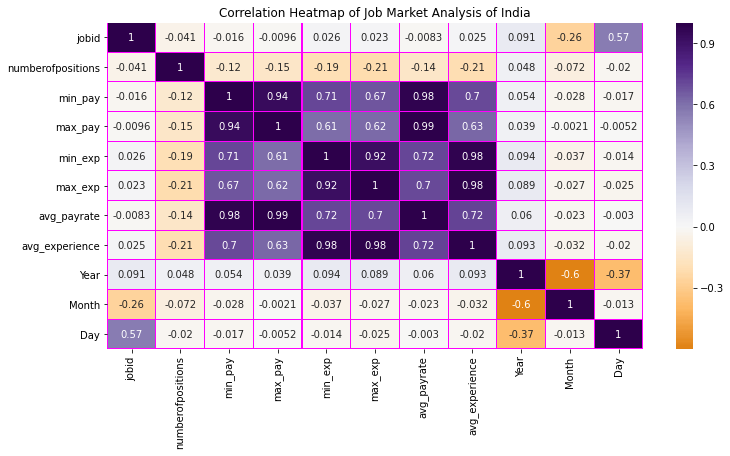

In [113]:
cor_mat = df.corr()
plt.figure(figsize=(12,6))
plt.title('Correlation Heatmap of Job Market Analysis of India')
sns.heatmap(cor_mat, annot=True,cmap="PuOr", center=0, linewidths=0.08,linecolor="magenta")
plt.show()

In [114]:
## Interpretation
## From the above correlation, we can conclude that :-
#### Minimun Pay and Average Payrate variables are highly positively correlated (correlation coefficient = 0.98).
#### Minimum Experience and Minimun Payrate variables are also highly positively correlated (correlation coefficient = 0.71).

In [137]:
## co-relation values with repect to min_pay

corr = df.corr()["min_pay"]
corr

jobid               -0.010856
numberofpositions   -0.121553
min_pay              1.000000
max_pay              0.938850
min_exp              0.709683
max_exp              0.677629
avg_payrate          0.979315
avg_experience       0.704354
day                 -0.009659
month               -0.025859
year                 0.057210
Name: min_pay, dtype: float64

### Company Based Analysis

In [139]:
comp=data['company'].str.strip().value_counts().reset_index()

In [140]:
comp.columns=["Company", "Number of Company"]

In [141]:
comp.head()

,Company,Number of Company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135


In [119]:
comp.head(10).style.background_gradient(cmap = "tab20c")

,Company,Number of Company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
5,Godrej Industries Ltd,125
6,Unitforce technologies Pvt. Ltd.,100
7,Capgemini,98
8,HCL Technologies,95
9,Axis Jobs,92


In [120]:
### Let me plot above data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

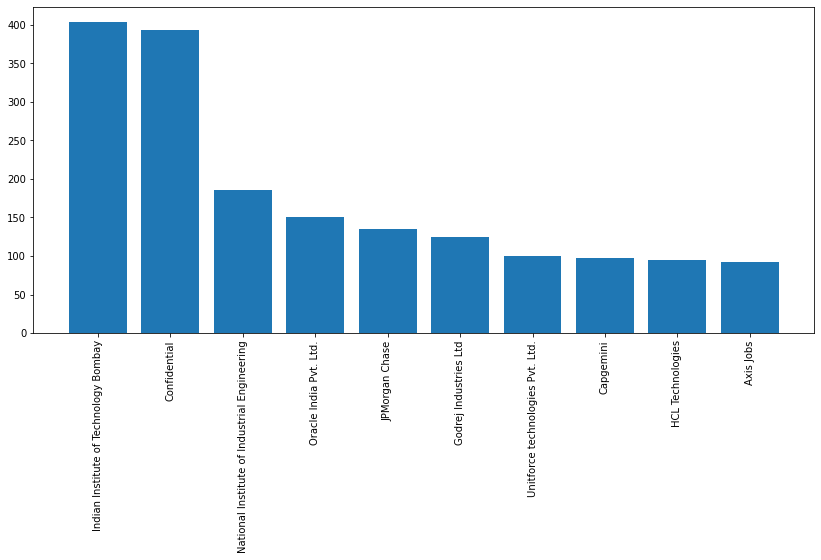

In [121]:
plt.figure(figsize=(14,6))
plt.bar(comp['Company'][0:10], comp['Number of Company'][0:10])
plt.xticks(rotation='vertical')

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

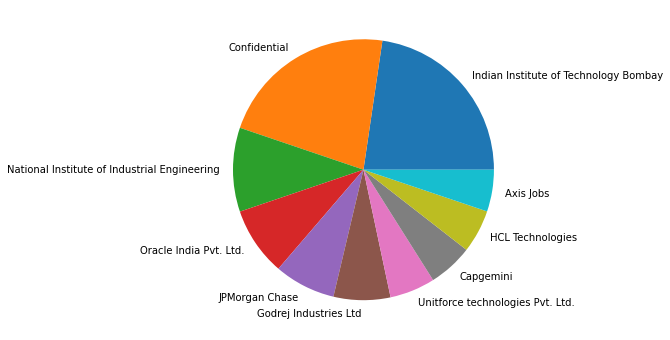

In [122]:
plt.figure(figsize=(14,6))
plt.pie(labels=comp['Company'][0:10], x=comp['Number of Company'][0:10])
plt.xticks(rotation='vertical')

In [123]:
### Lets try to automate above stuffs

In [158]:
def perform_analysis(data ,feature,col1,col2,chart):
    '''This will return us plots depending upon whatever chart we want
    
    Parameters
    -------
    
    data:dataframe 
    
    feature:column_name that we have to consider for analysis
    
    col1:1st column name that u want to assign to dataframe
    
    col2:2nd column name that u want to assign to dataframe
    
    @chart:if value of chart is 1 ,it represents bar chart
    @chart:if value of chart is 2 ,it represents pie chart
    
    '''
    dataframe=data[feature].str.strip().value_counts().reset_index()
    dataframe.columns=[col1, col2]
    print(dataframe.head())
    
    if chart==1:
        
        print('This is my bar chart')
        plt.figure(figsize=(14,6))
        plt.bar(dataframe[col1][0:10], dataframe[col2][0:10])
        plt.xticks(rotation='vertical')
        
    elif chart==2:
        
        print('\n This is my pie chart \n')
        plt.figure(figsize=(14,6))
        plt.pie(labels=dataframe[col1][0:10], x=dataframe[col2][0:10])
        plt.xticks(rotation='vertical')
        

In [159]:
print(perform_analysis.__doc__)

This will return us plots depending upon whatever chart we want
    
    data:dataframe 
    
    feature:column_name that we have to consider for analysis
    
    col1:1st column name that u want to assign to dataframe
    
    col2:2nd column name that u want to assign to dataframe
    
    @chart:1 represents bar chart
    @chart:2 represents pie chart
    
    


In [160]:
### print(pd.read_csv.__doc__)


Read a comma-separated values (csv) file into DataFrame.

Also supports optionally iterating or breaking of the file
into chunks.

Additional help can be found in the online docs for
`IO Tools <https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html>`_.

Parameters
----------
filepath_or_buffer : str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, gs, and file. For file URLs, a host is
    expected. A local file could be: file://localhost/path/to/table.csv.

    If you want to pass in a path object, pandas accepts any ``os.PathLike``.

    By file-like object, we refer to objects with a ``read()`` method, such as
    a file handle (e.g. via builtin ``open`` function) or ``StringIO``.
sep : str, default ','
    Delimiter to use. If sep is None, the C engine cannot automatically detect
    the separator, but the Python parsing engine can, meaning the latter will
    be used and auto

                                        Company  Number of Company
0         Indian Institute of Technology Bombay                403
1                                  Confidential                393
2  National Institute of Industrial Engineering                185
3                        Oracle India Pvt. Ltd.                151
4                                JPMorgan Chase                135

 This is my pie chart 



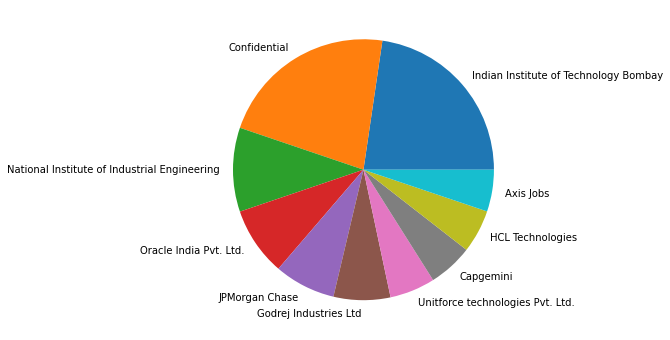

In [125]:
perform_analysis(data,'company',"Company", "Number of Company",2)

### Industries Based Analysis

                               industries  no of industry
0         IT-Software / Software Services            9216
1         Education / Teaching / Training            1322
2                BPO / Call Centre / ITES            1254
3  Banking / Financial Services / Broking            1238
4                  Recruitment / Staffing            1129

 This is my pie chart 



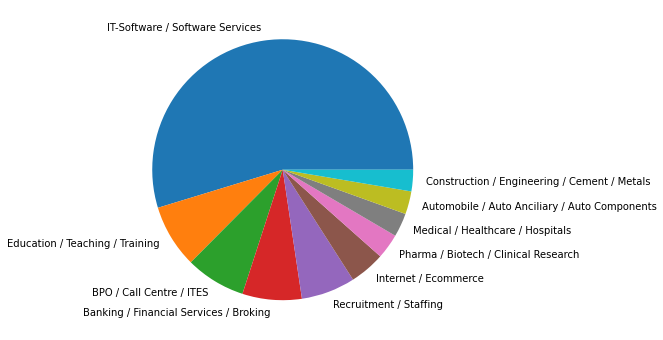

In [126]:
perform_analysis(data,'industry','industries','no of industry',2)

### Jobtitle Analysis

In [127]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_payrate',
       'avg_experience', 'Year', 'Month', 'Day'],
      dtype='object')

                        jobTitles  number of jobs
0  Business Development Executive              93
1    Business Development Manager              92
2               Software Engineer              81
3                 Project Manager              67
4               Android Developer              65

 This is my pie chart 



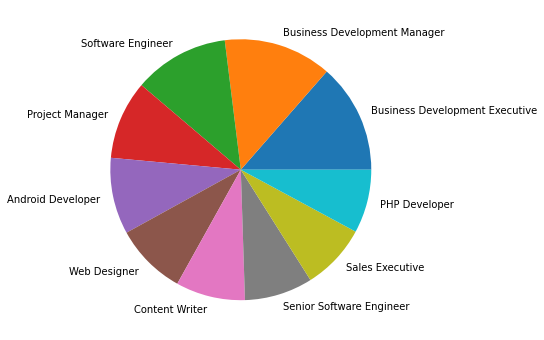

In [128]:
perform_analysis(data,'jobtitle' , 'jobTitles','number of jobs',2)

### Skills Analysis

                                  Skills  count
0  IT Software - Application Programming   5989
1                                  Sales   2893
2                                   ITES   1640
3                               Teaching   1091
4                                     HR    928
This is my bar chart


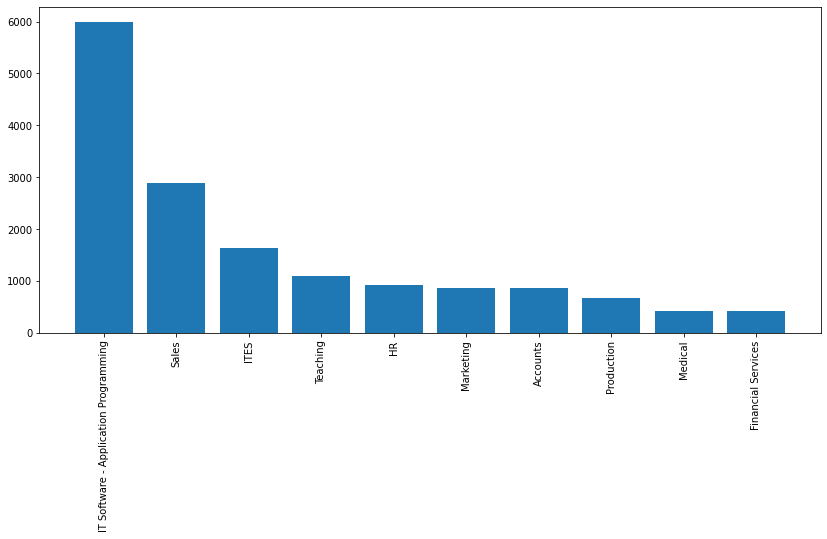

In [129]:
perform_analysis(data,'skills','Skills','count',1)

In [130]:
##IT Software - Application Programming is highly demanded skill

### joblocation analysis

        city  job count
0  Bangalore       5228
1     Mumbai       2887
2      Delhi       2741
3  Hyderabad       2182
4    Chennai       1204

 This is my pie chart 



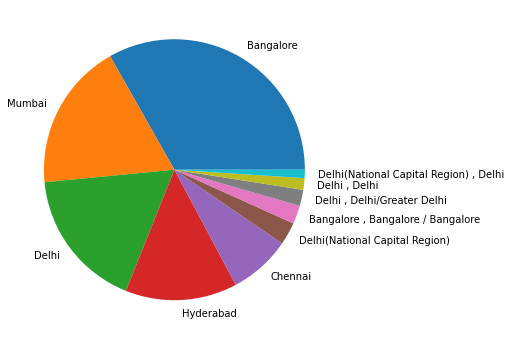

In [131]:
perform_analysis(data,'joblocation_address','city','job count',2)

### Payrate Analysis

In [132]:
### Co-relation Between Minimum Experience and Minimum Payrate

Text(0.5, 1.0, 'Stripplots between min_exp & min_pay')

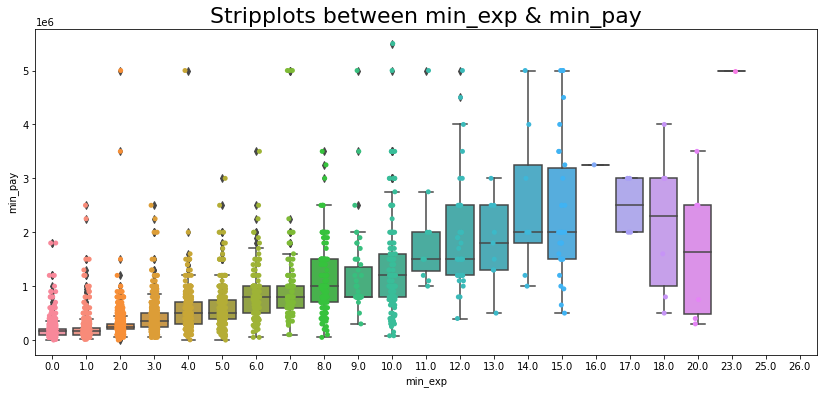

In [133]:
plt.figure(figsize=(14,6))

sns.stripplot(x='min_exp', y='min_pay', data=data)
sns.boxplot(x='min_exp', y='min_pay', data=data)
plt.title('Stripplots between min_exp & min_pay', fontsize=22)


### Co-relation Between Maximum Experience and Maximum Payrate

Text(0.5, 1.0, 'Stripplots between max_exp & max_pay')

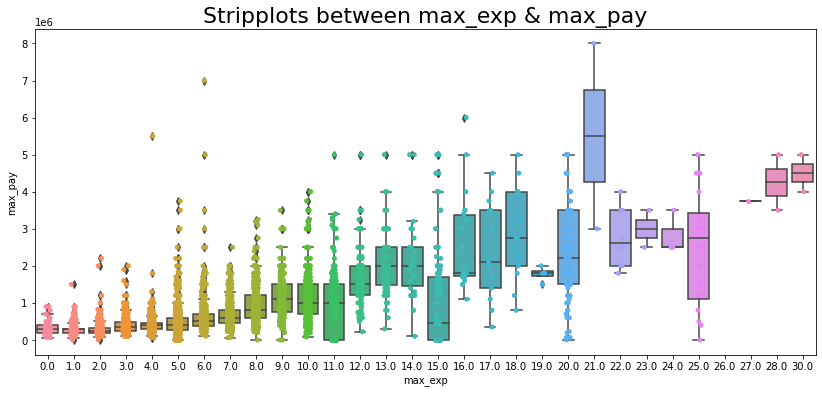

In [134]:
plt.figure(figsize=(14,6))

sns.stripplot(x='max_exp', y='max_pay', data=data)
sns.boxplot(x='max_exp', y='max_pay', data=data)
plt.title('Stripplots between max_exp & max_pay', fontsize=22)


In [135]:
### Relation Between Minimum, Maximum Experience And Minimum Payrate

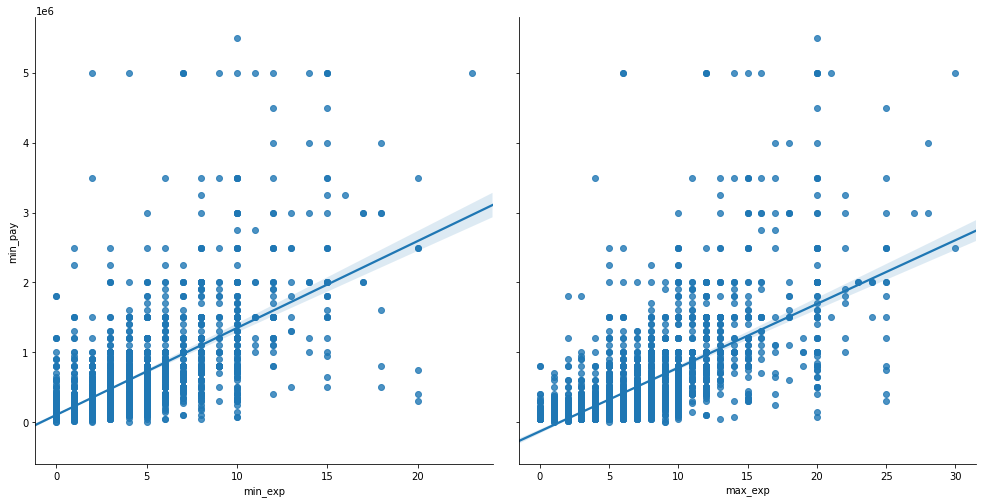

In [136]:
sns.pairplot(data, size=7,aspect=1,
             x_vars=["min_exp","max_exp"],
             y_vars=["min_pay"],kind='reg')

### median of a max_pay Industry-wise

In [137]:

data[['max_pay','industry']].groupby(["industry"]).median().head(5)

,max_pay
industry,
Accounting / Finance,600000.0
Advertising / PR / MR / Event Management,500000.0
Agriculture / Dairy,325000.0
Animation / Gaming,287500.0
Architecture / Interior Design,412500.0


In [138]:
data[['max_pay','industry']].groupby(["industry"]).median().sort_values(by='max_pay',
                                                                        ascending=False).head(10)

,max_pay
industry,
Pulp and Paper,1312500.0
Strategy / Management Consulting Firms,1200000.0
Glass / Glassware,1025000.0
Telecom/ISP,950000.0
Tyres,900000.0
Ceramics / Sanitary ware,900000.0
IT-Software / Software Services,800000.0
Aviation / Aerospace Firms,800000.0
Water Treatment / Waste Management,800000.0


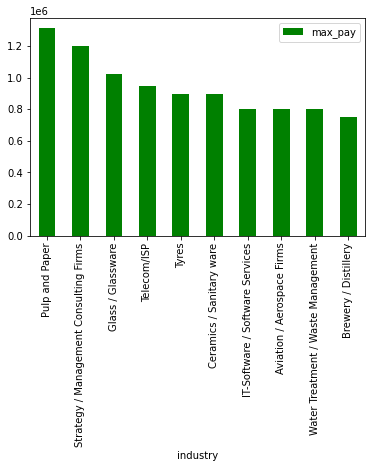

In [139]:
data[['max_pay','industry']].groupby(["industry"]).median().sort_values(by='max_pay',
                                                                        ascending=False).head(10).plot(kind='bar',color='green')

### median of a min_pay Industry-wise

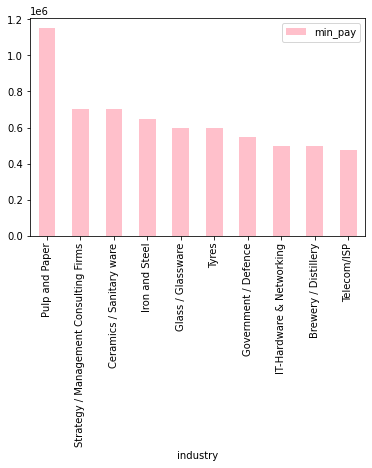

In [140]:
data[['min_pay','industry']].groupby(["industry"]).median().sort_values(by='min_pay',
                                                                        ascending=False).head(10).plot(kind='bar',color='pink')

In [141]:
data['skills'].nunique()

45

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

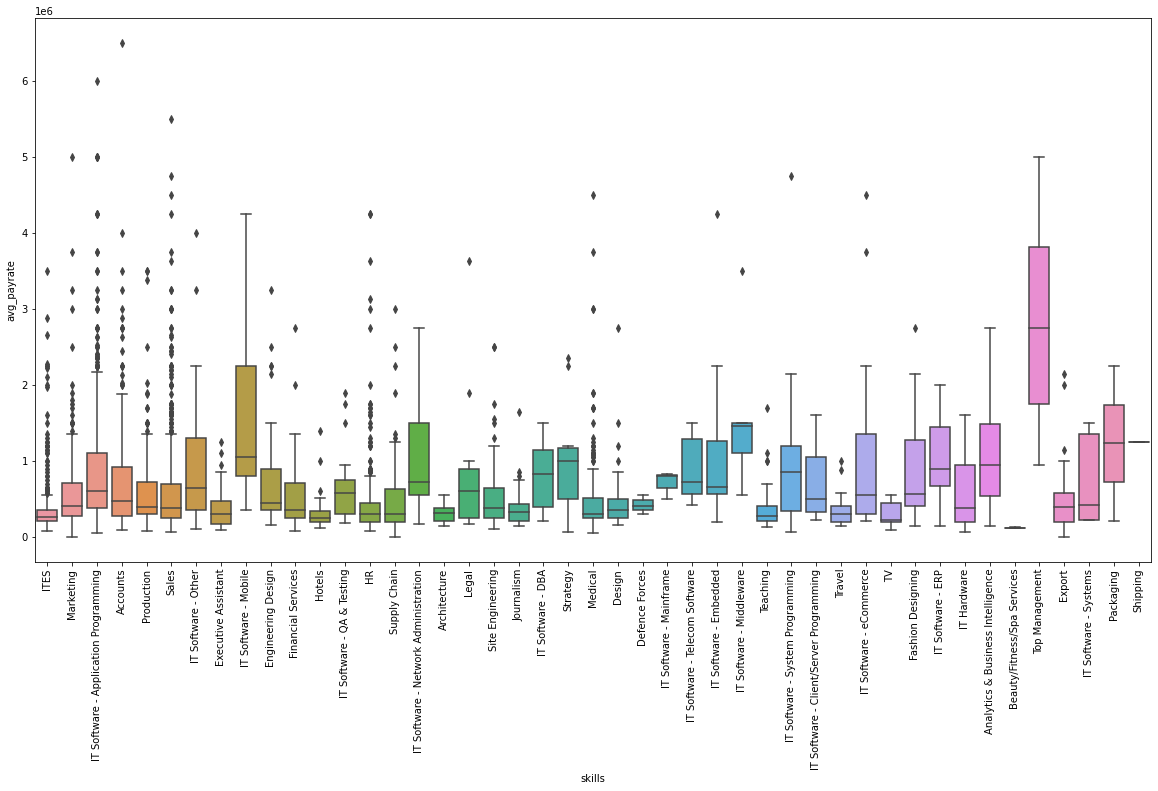

In [142]:
plt.figure(figsize=(20,10))
sns.boxplot(x='skills',y='avg_payrate',data=data)
plt.xticks(rotation='vertical')

In [143]:
### lets say we have to extract what are my Top 10 skills for which I get good pay

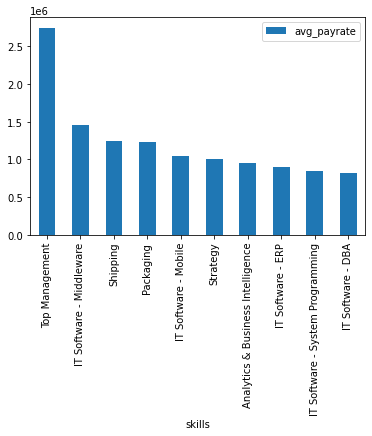

In [144]:

data[['avg_payrate','skills']].groupby(["skills"]).median().sort_values(by='avg_payrate',
                                                                  ascending=False).head(10).plot.bar()

In [ ]:
### In a similar way , u can Analyse  ,  what are my Top 10 Job for which I can get good pay?
##df[['avg_payrate','jobtitle']].groupby(["jobtitle"]).median().sort_values(by='avg_payrate',ascending=False).head(10).plot.bar()


In [169]:
def find_dist(feature):
    return sns.distplot(data[feature].dropna())

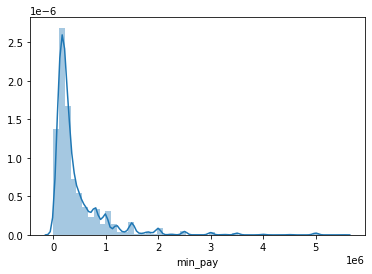

In [170]:
find_dist('min_pay')

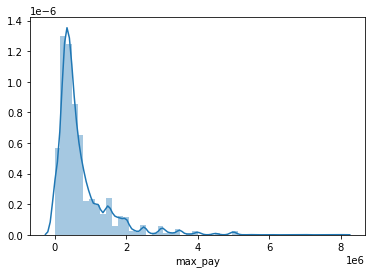

In [171]:
find_dist('max_pay')

### Analyse The Available Position In The Industry

In [145]:
data['numberofpositions'].nunique()

84

In [152]:
data.head()

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_payrate,avg_experience,Year,Month,Day
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,187500.0,0.5,2016.0,5.0,21.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,200000.0,0.0,2016.0,5.0,21.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,NaN,6.0,2016.0,10.0,13.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,11.0,15.0,NaN,13.0,2016.0,10.0,13.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,NaN,NaN,6.0,8.0,NaN,7.0,2016.0,10.0,13.0


In [153]:
data.groupby('industry')['numberofpositions'].sum()

industry
Accounting / Finance                                     365.0
Advertising / PR / MR / Event Management                5395.0
Agriculture / Dairy                                       26.0
Animation / Gaming                                         6.0
Architecture / Interior Design                            78.0
                                                        ...   
Travel / Hotels / Restaurants / Airlines / Railways    10421.0
Tyres                                                      3.0
Water Treatment / Waste Management                        14.0
Wellness / Fitness / Sports                               28.0
Wellness / Fitness / Sports / Beauty                      19.0
Name: numberofpositions, Length: 63, dtype: float64

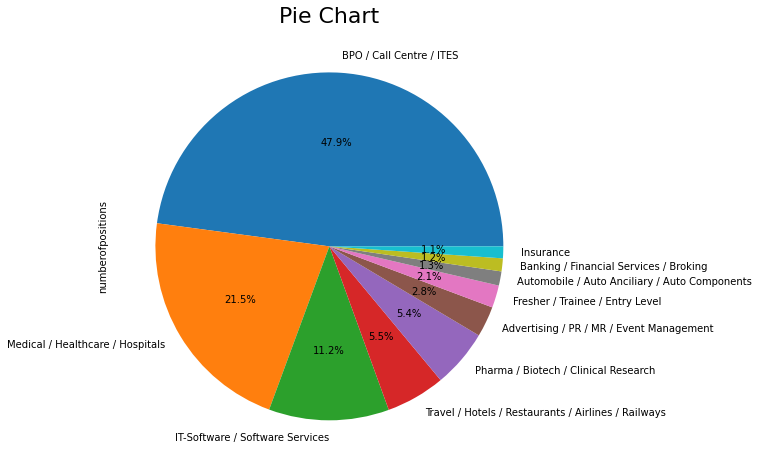

In [165]:
plt.figure(figsize=(14,8))
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title('Pie Chart', fontsize=22)
plt.show()